In [69]:
import xarray as xr
import numpy as np
import pandas as pd
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
import matplotlib as plt
import cartopy
from  cartopy import crs as ccrs

from bokeh.tile_providers import STAMEN_TONER
from bokeh.tile_providers import STAMEN_TERRAIN
from bokeh.models import WMTSTileSource

import iris
import matplotlib as plt


from cartopy import crs
from cartopy import feature as cf
from geoviews import feature as gf

hv.notebook_extension('bokeh','matplotlib')
%output backend='matplotlib'
%opts Feature [projection=crs.Mercator()]

In [49]:
import bokeh

In [3]:
tiles = {'OpenMap': WMTSTileSource(url='http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png'),
         'ESRI': WMTSTileSource(url='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.jpg'),
         'Wikipedia': WMTSTileSource(url='https://maps.wikimedia.org/osm-intl/{Z}/{X}/{Y}@2x.png')          
         ,'Stamen Terrain' : STAMEN_TERRAIN }

In [4]:
%%output backend='bokeh'
%%opts WMTS [width=450 height=250 xaxis=None yaxis=None]
hv.NdLayout({name: gv.WMTS(wmts, extents=(0, -90, 360, 90), crs=ccrs.PlateCarree())
            for name, wmts in tiles.items()}, kdims=['Source']).cols(2)

b':NdLayout   [Source]\n   :WMTS   [Longitude,Latitude]'

In [5]:
tiles2 = {'watercolor' : WMTSTileSource(url='http://c.tile.stamen.com/watercolor/{Z}/{X}/{Y}.jpg')
          ,'Landscape' : WMTSTileSource(url='http://c.tile.thunderforest.com/landscape/{Z}/{X}/{Y}.png?apikey=f74ed385c36841059b61766502585a4f')
         ,'outdoors' : WMTSTileSource(url='https://c.tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=f74ed385c36841059b61766502585a4f')
         , 'spinal map' : WMTSTileSource(url='https://c.tile.thunderforest.com/spinal-map/{z}/{x}/{y}.png?apikey=f74ed385c36841059b61766502585a4f')}

In [6]:
%%output backend='bokeh'
%%opts WMTS [width=450 height=250 xaxis=None yaxis=None]
hv.NdLayout({name: gv.WMTS(wmts, extents=(0, -90, 360, 90), crs=ccrs.PlateCarree())
            for name, wmts in tiles2.items()}, kdims=['Source']).cols(2)

b':NdLayout   [Source]\n   :WMTS   [Longitude,Latitude]'

# **Inladen van CollectieDataset Modirisk**

Het bestand 'Complete_CollectionData_Modirisk_Refined_DwC.csv' is een export van Open Refine


In [7]:
modirisk = pd.read_csv('./Collections_data/Complete_CollectionData_Modirisk_Refined_DwC.csv', encoding="ISO-8859-1")

In [8]:
modirisk.tail()

,collectionCode,datasetName,basisOfRecord,occurrenceID,recordedBy,sex,lifeStage,eventDate,year,month,day,municipality,locality,decimalLatitude,decimalLongitude,geodeticDatum,identifiedBy,scientificName,kingdom
1369,RINS Additional Collection,MODIRISK:RBINS Diptera: Culicidae Collection,PreservedSpecimen,RBINS:modirisk:collection:1377,J. Verbeke,Female,Adult,9/5/1945,1945.0,5.0,9.0,Lochristi,Zaffelare,51.110571,3.892831,WGS84,Wouter Dekoninck,Ochlerotatus rusticus,Animalia
1370,RINS Additional Collection,MODIRISK:RBINS Diptera: Culicidae Collection,PreservedSpecimen,RBINS:modirisk:collection:1378,Marc Pollet,Female,Adult,9/6/2006,2006.0,6.0,9.0,Virelles,"Etang de Virelles, Site B",50.071774,4.362509,WGS84,Wouter Dekoninck,Ochlerotatus rusticus,Animalia
1371,RINS Additional Collection,MODIRISK:RBINS Diptera: Culicidae Collection,PreservedSpecimen,RBINS:modirisk:collection:1379,NaN,Male,Adult,mm/1947,1947.0,NaN,NaN,Destelbergen,NaN,51.066137,3.820617,WGS84,Wouter Dekoninck,Ochlerotatus sticticus,Animalia
1372,RINS Additional Collection,MODIRISK:RBINS Diptera: Culicidae Collection,PreservedSpecimen,RBINS:modirisk:collection:1380,Guilliaume Severin,Female,Adult,25/8/1922,1922.0,8.0,25.0,Hoogstraten,NaN,51.415464,4.761611,WGS84,Wouter Dekoninck,Ochlerotatus sticticus,Animalia
1373,RINS Additional Collection,MODIRISK:RBINS Diptera: Culicidae Collection,PreservedSpecimen,RBINS:modirisk:collection:1381,A. Collart,Female,Adult,28/5/1937,1937.0,5.0,28.0,Malmedy,"Hautes-Fagnes, Fagne de Duzos-MoÃÂ©pa",50.446361,6.021725,WGS84,Wouter Dekoninck,Ochlerotatus sticticus,Animalia


# Definieer pop
geoviews datasets pop is 'modirisk' met key dimensions kdims: scientificName, sex, year

In [9]:
pop = gv.Dataset(modirisk, kdims=['scientificName', 'sex', 'year'])


In [10]:
pop

b':Dataset   [scientificName,sex,year]   (collectionCode,datasetName,basisOfRecord,occurrenceID,recordedBy,lifeStage,eventDate,month,day,municipality,locality,decimalLatitude,decimalLongitude,geodeticDatum,identifiedBy,kingdom)'

# Occurrence op de kaart (methode 1)

1. %%output backend='bokeh'                                     **we gebruiken Bokeh**
2. %%opts Overlay [width=1200 height=600 xaxis=None yaxis=None] **grootte kaart**
3. %%opts Points (size=3 cmap='inferno') [tools=['hover'] color_index=2] ** kleuren en punten **
4. (gv.WMTS(tiles['Wikipedia']) *\                                          ** achtergrondmap**
   pop.to(gv.Points, kdims=['decimalLongitude', 'decimalLatitude'],         
   vdims=['scientificName', 'sex', 'year'], crs=ccrs.PlateCarree()))  ** pop op de kaart zetten, met keydimensies                                                                                         decimalLatitude en decimalLongitude en value                                                                                     dimensions scientificName, sex, year, crs = Platecarree **

In [11]:
%%output backend='bokeh'
%%opts Overlay [width=1200 height=600 xaxis=None yaxis=None] 
%%opts Points (size=3 cmap='inferno') [tools=['hover'] color_index=2]
(gv.WMTS(tiles['Stamen Terrain']) *\
pop.to(gv.Points, kdims=['decimalLongitude', 'decimalLatitude'],
              vdims=['scientificName', 'sex', 'year'], crs=ccrs.PlateCarree()))

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [decimalLongitude,decimalLatitude]   (scientificName,sex,year)

In [12]:
%%output backend='bokeh'
%%opts Overlay [width=1200 height=600 xaxis=None yaxis=None] 
%%opts Points (size=3 cmap='inferno') [tools=['hover'] color_index=2]
(gv.WMTS(tiles2['spinal map']) *\
pop.to(gv.Points, kdims=['decimalLongitude', 'decimalLatitude'],
              vdims=['scientificName',  'sex','year'], crs=ccrs.PlateCarree()))

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [decimalLongitude,decimalLatitude]   (scientificName,sex,year)

In [13]:
modirisk2 = pop.to(gv.Points, kdims=['decimalLongitude', 'decimalLatitude'],
                    vdims=['scientificName' , 'sex' , 'year' ], crs=crs.PlateCarree())

In [14]:
%%output backend='bokeh'
%%opts Overlay [width=1200 height=600 xaxis=None yaxis=None] 
%%opts Points (size=5 cmap='inferno') [tools=['hover'] color_index=2]
gv.WMTS(WMTSTileSource(url='https://maps.wikimedia.org/osm-intl/{Z}/{X}/{Y}@2x.png')) * modirisk2

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [decimalLongitude,decimalLatitude]   (scientificName,sex,year)

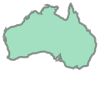

In [15]:
land_geoms = list(gf.land.data.geometries())
land_geoms[21]

:Overlay
   .Shape.I  :Shape   [Longitude,Latitude]   (Level)
   .Points.I :Points   [x,y]
   .Text.I   :Text   [x,y]
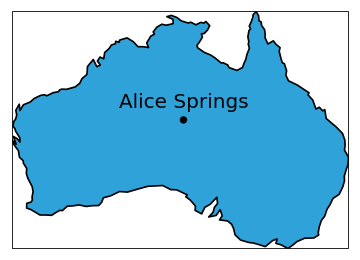

In [16]:
%%opts Points (color="black")
%%output dpi=120
australia = gv.Shape(land_geoms[21], crs=crs.PlateCarree())

australia * hv.Points([(133.870,-23.700)]) * hv.Text(133.870,-21.5, 'Alice Springs')

:Overlay
   .Shape.I  :Shape   [Longitude,Latitude]   (Level)
   .Points.I :Points   [Longitude,Latitude]
   .Text.I   :Text   [x,y]
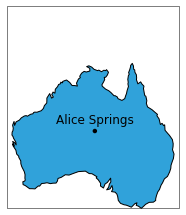

In [17]:
%%opts Points (color="black")
pc=crs.PlateCarree()
australia(plot=dict(projection=crs.Mollweide(central_longitude=133.87))) * \
gv.Points([(133.870,-23.700)],crs=pc) * gv.Text(133.870,-21.5, 'Alice Springs',crs=pc)

In [18]:
%output dpi=120 size=150

b':NdOverlay   [Element]\n   :Shape   [Longitude,Latitude]   (Level)'
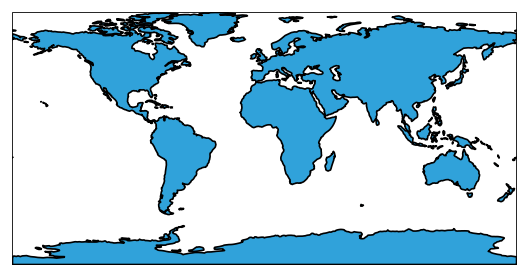

In [19]:

%%opts NdOverlay [aspect=2]
hv.NdOverlay({i: gv.Shape(s, crs=crs.PlateCarree()) for i, s in enumerate(land_geoms)})

In [20]:
%%output backend='bokeh'
%%opts NdOverlay [aspect=2]
hv.NdOverlay({i: gv.Shape(s, crs=crs.PlateCarree()) for i, s in enumerate(land_geoms)})

b':NdOverlay   [Element]\n   :Shape   [Longitude,Latitude]   (Level)'

In [21]:
shapefile='./shapefiles/EcoregiosBelgium.shp'

In [40]:
%%output backend='bokeh'
%%opts NdOverlay [aspect=0.75]
shapefile='./shapefiles/EcoregiosBelgium.shp'
gv.Shape.from_shapefile(shapefile, crs=crs.PlateCarree())

b':NdOverlay   [Index]\n   :Shape   [Longitude,Latitude]   (Level)'

In [47]:
%%output backend='bokeh'
%%opts NdOverlay [aspect=0.75]
shapefile='./shapefiles/BEL_adm3.shp'
gv.Shape.from_shapefile(shapefile, crs=crs.PlateCarree())

b':NdOverlay   [Index]\n   :Shape   [Longitude,Latitude]   (Level)'

In [56]:
import shapefile
 
r = shapefile.Reader('./shapefiles/BEL_adm3')
shapes = r.shapes()
records = r.records()

In [88]:
shapes

In [64]:
records

[[23,
  'BEL',
  'Belgium',
  1,
  'Bruxelles',
  1,
  'Bruxelles',
  1,
  'Brussel',
  0,
  b'               ',
  'Arrondissement',
  'Arrondissement',
  b'                                                                           ',
  'Bruxelles'],
 [23,
  'BEL',
  'Belgium',
  2,
  'Vlaanderen',
  2,
  'Antwerpen',
  2,
  'Antwerpen',
  0,
  b'               ',
  'Arrondissement',
  'Arrondissement',
  b'                                                                           ',
  'Anvers'],
 [23,
  'BEL',
  'Belgium',
  2,
  'Vlaanderen',
  2,
  'Antwerpen',
  3,
  'Mechelen',
  0,
  b'               ',
  'Arrondissement',
  'Arrondissement',
  b'                                                                           ',
  'Malines'],
 [23,
  'BEL',
  'Belgium',
  2,
  'Vlaanderen',
  2,
  'Antwerpen',
  4,
  'Turnhout',
  0,
  b'               ',
  'Arrondissement',
  'Arrondissement',
  b'                                                                           ',
  b'      

In [65]:
for record, shape in zip(records,shapes):
    lons,lats = zip(*shape.points)
    data = np.array((lons, lats)).T

In [66]:
data

array([[  4.52995825,  50.31077957],
       [  4.53583717,  50.31018829],
       [  4.54056025,  50.31027222],
       [  4.55350542,  50.31257248],
       [  4.56177568,  50.31449127],
       [  4.57507753,  50.31703186],
       [  4.5807147 ,  50.31747437],
       [  4.59533358,  50.31797791],
       [  4.59434748,  50.31248474],
       [  4.59426975,  50.31010437],
       [  4.59440804,  50.30858612],
       [  4.59506035,  50.30653   ],
       [  4.59545469,  50.30595016],
       [  4.59712029,  50.30432892],
       [  4.59751034,  50.30374527],
       [  4.59800863,  50.30240631],
       [  4.59830713,  50.30014038],
       [  4.59839439,  50.29293442],
       [  4.59882593,  50.29072952],
       [  4.59953499,  50.2894783 ],
       [  4.60168934,  50.28736877],
       [  4.6032548 ,  50.28450394],
       [  4.60538197,  50.28237534],
       [  4.60576582,  50.28180313],
       [  4.6062541 ,  50.28051758],
       [  4.60692501,  50.27779007],
       [  4.60761595,  50.2765274 ],
 

In [67]:
if len(shape.parts) == 1:
    segs = [data,]
else:
    segs = []
    for i in range(1,len(shape.parts)):
        index = shape.parts[i-1]
        index2 = shape.parts[i]
        segs.append(data[index:index2])
    segs.append(data[index2:])

In [80]:
from matplotlib.collections import LineCollection
from matplotlib import cm
import matplotlib.pyplot as plt
import shapefile

In [82]:
ax = plt.subplot(111)

In [83]:
lines = LineCollection(segs,antialiaseds=(1,))
lines.set_facecolors(cm.jet(np.random.rand(1)))
lines.set_edgecolors('k')
lines.set_linewidth(0.1)
ax.add_collection(lines)

In [85]:
plt.savefig('tutorial10.png',dpi=300)

In [86]:
plt.show()

In [87]:
ax